In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
gpt_4o_results = pd.read_csv("./results/results_chatgpt_gpt-4o-2024-05-13.csv")
gpt_4o_mini_results = pd.read_csv("./results/results_chatgpt_gpt-4o-mini-2024-07-18.csv")
gpt_4_turbo_results = pd.read_csv("./results/results_chatgpt_gpt-4-turbo-2024-04-09.csv")

claude_3_5_sonnet_results = pd.read_csv("./results/results_claude_claude-3-5-sonnet-20240620.csv")
claude_3_haiku_results = pd.read_csv("./results/results_claude_claude-3-haiku-20240307.csv")

gemini_1_5_results = pd.read_csv("./results/results_google_gemini-1.5-flash-001.csv")

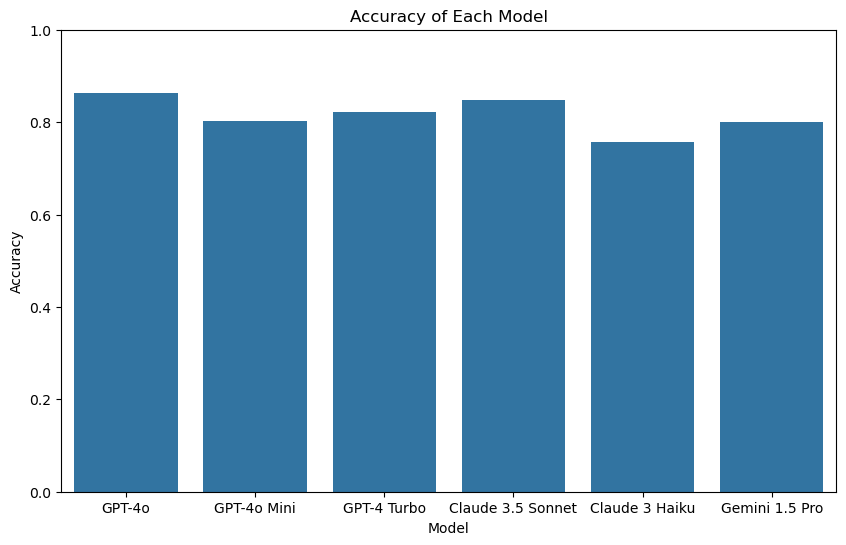

In [36]:
def plot_accuracy(df, model_name):
    accuracy = df['correct'].mean()
    return pd.DataFrame({'Model': [model_name], 'Accuracy': [accuracy]})


accuracy_chatgpt_gpt_4o = plot_accuracy(gpt_4o_results, 'GPT-4o')
accuracy_chatgpt_gpt_4o_mini = plot_accuracy(gpt_4o_mini_results, 'GPT-4o Mini')
accuracy_chatgpt_gpt_4_turbo = plot_accuracy(gpt_4_turbo_results, 'GPT-4 Turbo')
accuracy_claude_3_5_sonnet = plot_accuracy(claude_3_5_sonnet_results, 'Claude 3.5 Sonnet')
accuracy_claude_3_haiku = plot_accuracy(claude_3_haiku_results, 'Claude 3 Haiku')
accuracy_gemini_1_5 = plot_accuracy(gemini_1_5_results, 'Gemini 1.5 Pro')

accuracy_df = pd.concat([accuracy_chatgpt_gpt_4o, accuracy_chatgpt_gpt_4o_mini, accuracy_chatgpt_gpt_4_turbo,
                         accuracy_claude_3_5_sonnet, accuracy_claude_3_haiku, accuracy_gemini_1_5])

plt.figure(figsize=(10, 6))
sns.barplot(data=accuracy_df, x='Model', y='Accuracy')
plt.title('Accuracy of Each Model')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Model')

plt.show()


,Subject,correct,Model
0,biology,0.800000,GPT-4o
1,chemistry,1.000000,GPT-4o
2,hard_geometry,0.300000,GPT-4o
3,hard_mathematics,0.771429,GPT-4o
4,mathematics,0.733333,GPT-4o
...,...,...,...
12,turkish_history,0.888889,Gemini 1.5 Pro
13,turkish_law,0.833333,Gemini 1.5 Pro
14,turkish_literature,0.578947,Gemini 1.5 Pro
15,turkish_politics,0.950000,Gemini 1.5 Pro


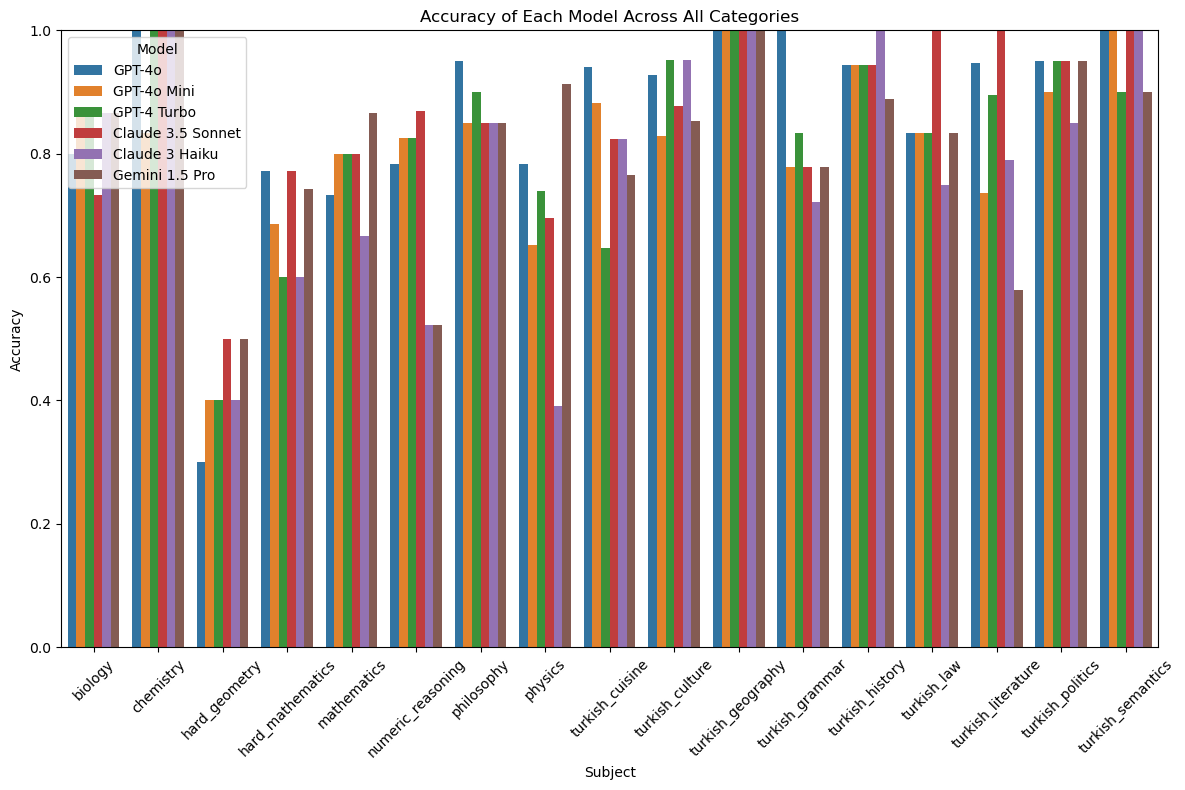

In [37]:
def calculate_accuracy_per_subject(df, model_name):
    subject_accuracy = df.groupby('Subject')['correct'].mean().reset_index()
    subject_accuracy['Model'] = model_name
    return subject_accuracy

accuracy_subject_chatgpt_gpt_4o = calculate_accuracy_per_subject(gpt_4o_results, 'GPT-4o')
accuracy_subject_chatgpt_gpt_4o_mini = calculate_accuracy_per_subject(gpt_4o_mini_results, 'GPT-4o Mini')
accuracy_subject_chatgpt_gpt_4_turbo = calculate_accuracy_per_subject(gpt_4_turbo_results, 'GPT-4 Turbo')
accuracy_subject_claude_3_5_sonnet = calculate_accuracy_per_subject(claude_3_5_sonnet_results, 'Claude 3.5 Sonnet')
accuracy_subject_claude_3_haiku = calculate_accuracy_per_subject(claude_3_haiku_results, 'Claude 3 Haiku')
accuracy_subject_gemini_1_5 = calculate_accuracy_per_subject(gemini_1_5_results, 'Gemini 1.5 Pro')

accuracy_subject_df = pd.concat([accuracy_subject_chatgpt_gpt_4o, accuracy_subject_chatgpt_gpt_4o_mini, 
                                 accuracy_subject_chatgpt_gpt_4_turbo, accuracy_subject_claude_3_5_sonnet, 
                                 accuracy_subject_claude_3_haiku, accuracy_subject_gemini_1_5])

display(accuracy_subject_df)

# Plot the accuracy of each model across all categories
plt.figure(figsize=(12, 8))
sns.barplot(data=accuracy_subject_df, x='Subject', y='correct', hue='Model')
plt.title('Accuracy of Each Model Across All Categories')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.xlabel('Subject')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()


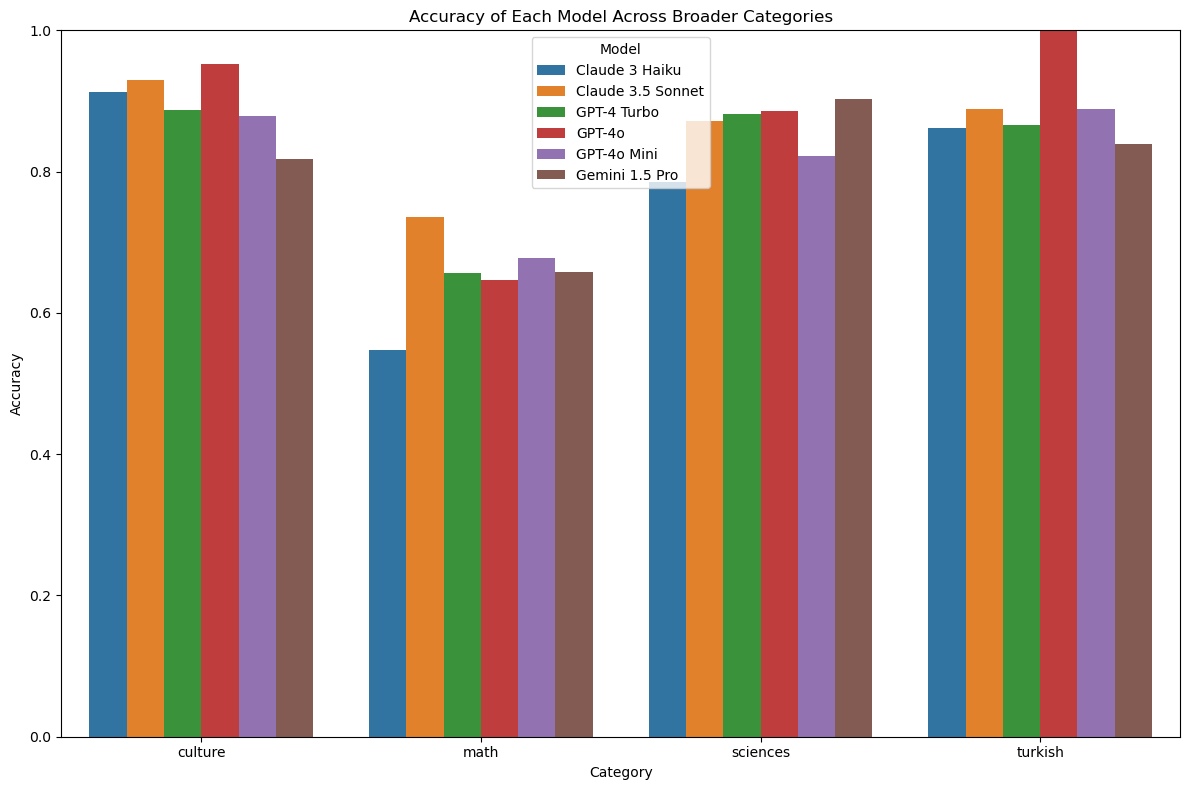

In [38]:
# Define the mapping of subjects to categories
general_categories = {
    "turkish_grammar": "turkish",
    "turkish_semantics": "turkish",
    "turkish_geography": "culture",
    "turkish_literature": "culture",
    "turkish_culture": "culture",
    "turkish_history": "culture",
    "turkish_cuisine": "culture",
    "numeric_reasoning": "math",
    "mathematics": "math",
    "hard_geometry": "math",
    "hard_mathematics": "math",
    "physics": "sciences",
    "biology": "sciences",
    "chemistry": "sciences",
    "turkish_law": "sciences",
    "philosophy": "sciences",
    "turkish_politics": "sciences",
}

accuracy_subject_df['Category'] = accuracy_subject_df['Subject'].map(general_categories)
accuracy_category_df = accuracy_subject_df.groupby(['Model', 'Category'])['correct'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(data=accuracy_category_df, x="Category", y="correct", hue="Model")
plt.title("Accuracy of Each Model Across Broader Categories")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.xlabel("Category")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


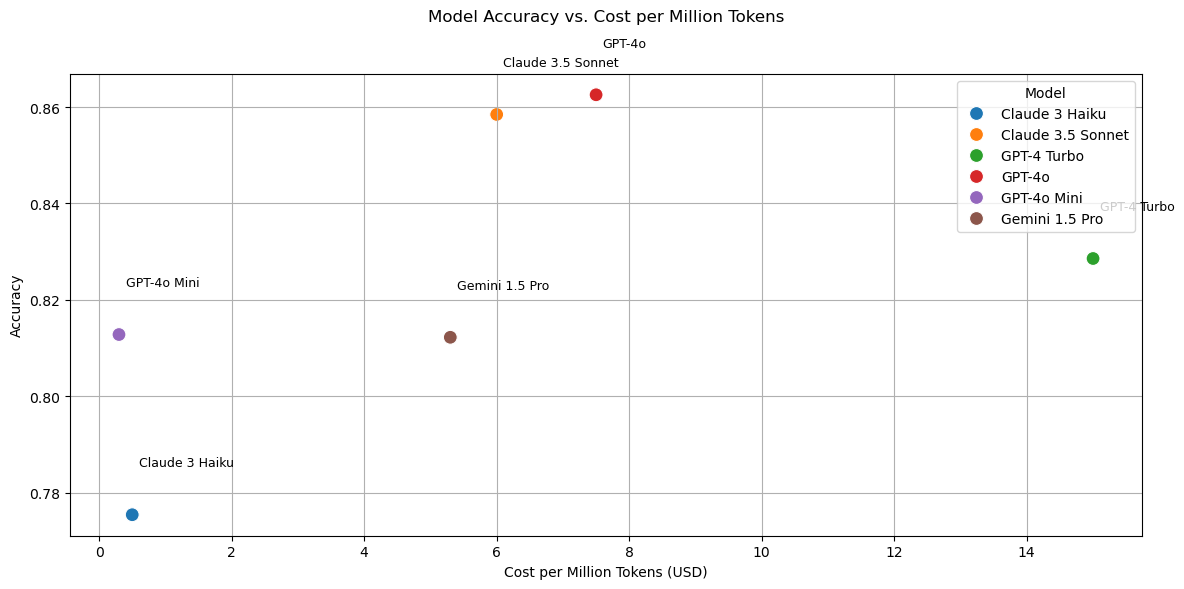

In [61]:
model_costs = {
    "GPT-4o": 7.5,
    "Claude 3.5 Sonnet": 6,
    "Claude 3 Haiku": 0.5,
    "GPT-4o Mini": 0.3,
    "GPT-4 Turbo": 15,
    "Gemini 1.5 Pro": 5.3,
}

# Extract accuracy and cost for each model
accuracy_cost_df = overall_accuracy_df[['Model', 'correct', 'Cost']].copy()
accuracy_cost_df.columns = ['Model', 'Accuracy', 'Cost']

# Create a 2D scatter plot of Accuracy vs. Cost
plt.figure(figsize=(12, 6))
sns.scatterplot(data=accuracy_cost_df, x='Cost', y='Accuracy', hue='Model', s=100)

# Annotate each point with the model name
for i, row in accuracy_cost_df.iterrows():
    plt.text(row['Cost'] + 0.1, row['Accuracy'] + 0.01, row['Model'], fontsize=9)

plt.title('Model Accuracy vs. Cost per Million Tokens', pad=38)
plt.xlabel('Cost per Million Tokens (USD)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()